## Assignment 5 P463 


In [36]:
#pip install mesa_reader

### Question 1: In Simulation.

### HR diagram


In [4]:
import mesa_reader as mr
import matplotlib.pyplot as plt
import numpy as np

### Question 2a

In [6]:
# MesaData object
h = mr.MesaData('./mesa_assgn5/LOGS/history.data')
p = mr.MesaData('./mesa_assgn5/LOGS/profile1.data')

In [7]:
# Extract data for plotting
log_Teff = h.log_Teff               # Logarithm of the effective temperature
log_L = h.log_L                     # Logarithm of the luminosity
star_age = h.star_age               # Age of the star in years
star_mass = h.star_mass             # Mass of the star in solar masses
log_R = h.log_R                     # Logarithm of the stellar radius in solar units

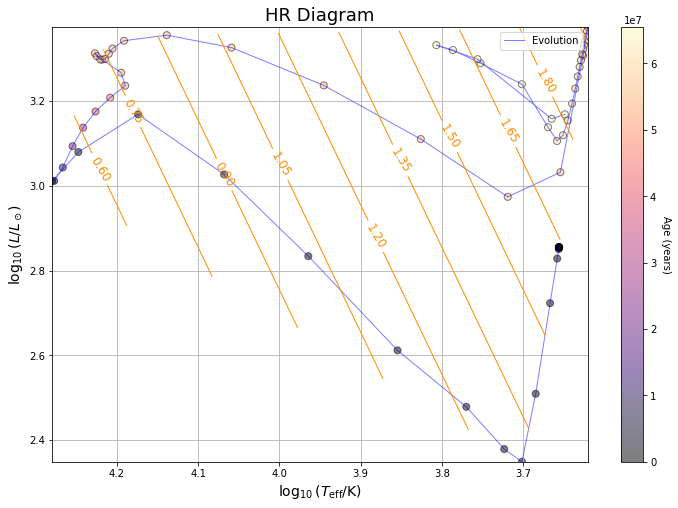

In [17]:
# HR Diagram
plt.figure(figsize=(12, 8))

sc = plt.scatter(log_Teff, log_L, c=star_age, cmap='magma', marker='o', s=50, edgecolor='k', alpha=0.5)
plt.plot(log_Teff, log_L, color='blue', linewidth=1, linestyle='-', alpha=0.5, label='Evolution')

plt.gca().invert_xaxis()

contour = plt.tricontour(log_Teff, log_L, log_R, levels=10, linewidths=1, colors='darkorange')
plt.clabel(contour, inline=True, fontsize=12, fmt='%.2f')

cbar = plt.colorbar(sc)
cbar.set_label('Age (years)', rotation=270, labelpad=15)

plt.title('HR Diagram', fontsize=18)
plt.xlabel(r'$\log_{10}(T_{\mathrm{eff}} / \mathrm{K})$', fontsize=14)
plt.ylabel(r'$\log_{10}(L / L_\odot)$', fontsize=14)


plt.grid(visible=True)
plt.legend(loc='best')

plt.savefig('plots/HR.png', dpi=1200)
plt.show()

#### HR Diagram showing the evolution of star with M = 6 Solar Mass. Color: age of the star. Contours: logarithm of the stellar radius

### Question 2.b


<Figure size 864x576 with 0 Axes>

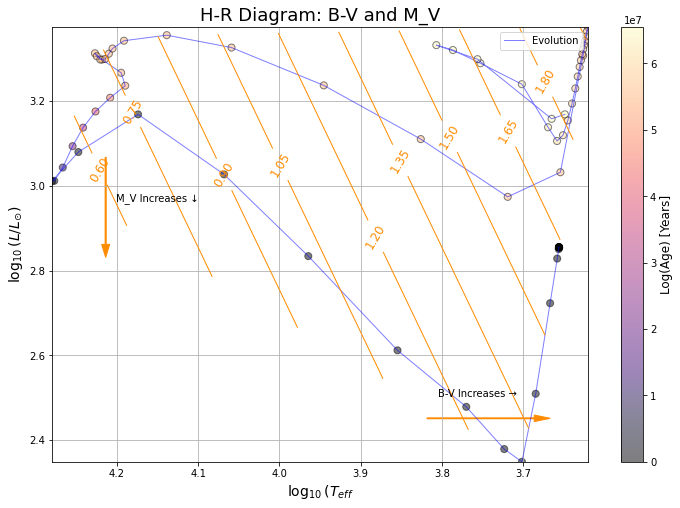

In [20]:
#Indicate the direction of increasing values: left for B − V and up for MV.

log_Teff = h.data('log_Teff')  # Logarithm of effective temperature
log_L = h.data('log_L')  # Logarithm of luminosity
star_age = h.star_age  # Age of the star

plt.figure(figsize=(12, 8))

# HR Diagram
plt.figure(figsize=(12, 8))

sc = plt.scatter(log_Teff, log_L, c=star_age, cmap='magma', marker='o', s=50, edgecolor='k', alpha=0.5)
plt.plot(log_Teff, log_L, color='blue', linewidth=1, linestyle='-', alpha=0.5, label='Evolution')

contour = plt.tricontour(log_Teff, log_L, log_R, levels=10, linewidths=1, colors='darkorange')
plt.clabel(contour, inline=True, fontsize=12, fmt='%.2f')

cbar = plt.colorbar(sc)
cbar.set_label('Log(Age) [Years]', fontsize=12)
 
plt.xlabel(r'$\log_{10}(T_{eff}} / K)$', fontsize=14)
plt.ylabel(r'$\log_{10}(L / L_{\odot})$', fontsize=14)
plt.gca().invert_xaxis() 


plt.grid(visible=True)
plt.legend(loc='best')



plt.annotate('B-V Increases →', xy=(0.72, 0.15), xycoords='axes fraction', fontsize=10, color='black')
plt.annotate('M_V Increases ↓', xy=(0.12, 0.6), xycoords='axes fraction', fontsize=10, color='black')

plt.arrow(0.7, 0.1, 0.2, 0, transform=plt.gca().transAxes, color='darkorange', width=0.002, head_width=0.015, head_length=0.03)
plt.arrow(0.1, 0.7, 0, -0.2, transform=plt.gca().transAxes, color='darkorange', width=0.002, head_width=0.015, head_length=0.03)

plt.title('H-R Diagram: B-V and M_V', fontsize=18)
plt.savefig('plots/HR_w_indicator.png', dpi=1200)
plt.show()

####  The B-V color index measures the color of the star, which is directly related to its temperature. As the star cools, the B-V color index increases; thus, it would increase to the right on the horizontal axis, opposite to the direction of decreasing temperature. The absolute magnitude ($M_V$) represents the star's intrinsic brightness, where higher magnitude values indicate a dimmer star. Consequently, MV increases downward on the vertical axis, opposite to the increase in luminosity. However, since we could not find the B-V color index values in the history files and found no relevant information in the documentation, we can not plot it.

### Question 2c



In [24]:
#What is the spectral type of your star on the main sequence?

# The effective temperature at ZAMS
Teff_zams = h.data('log_Teff')[0]  
Teff_zams_K = 10**Teff_zams  

# Determine the spectral type
if Teff_zams_K > 30000:
    spectral_type_zams = 'O'
elif Teff_zams_K > 10000:
    spectral_type_zams = 'B'
elif Teff_zams_K > 7500:
    spectral_type_zams = 'A'
elif Teff_zams_K > 6000:
    spectral_type_zams = 'F'
elif Teff_zams_K > 5200:
    spectral_type_zams = 'G'
elif Teff_zams_K > 3700:
    spectral_type_zams = 'K'
else:
    spectral_type_zams = 'M'

print(f"Spectral type at zero age main sequence: {spectral_type_zams}")

Spectral type at zero age main sequence: K


### Question 2d


In [25]:
#What is the spectral type of your star at the onset of helium burning?

# The onset of helium burning

onset_index = np.where(h.data('log_LHe') > -1)[0][0]  # LHe becomes dominant

Teff_he_burn = h.data('log_Teff')[onset_index]
Teff_he_burn_K = 10**Teff_he_burn  

if Teff_he_burn_K > 30000:
    spectral_type_he_burn = 'O'
elif Teff_he_burn_K > 10000:
    spectral_type_he_burn = 'B'
elif Teff_he_burn_K > 7500:
    spectral_type_he_burn = 'A'
elif Teff_he_burn_K > 6000:
    spectral_type_he_burn = 'F'
elif Teff_he_burn_K > 5200:
    spectral_type_he_burn = 'G'
elif Teff_he_burn_K > 3700:
    spectral_type_he_burn = 'K'
else:
    spectral_type_he_burn = 'M'

print(f"Spectral type when helium starts burning: {spectral_type_he_burn}")

Spectral type when helium starts burning: K


### Question 2e

In [27]:
# How long does it take for your star to reach the helium core burning phase?

# The age at ZAMS and onset of helium burning

age_zams = h.star_age[0]
age_he_burn = h.star_age[onset_index]

# Duration
time_to_he_burn = age_he_burn - age_zams

print(f"Time at helium core burning: {time_to_he_burn:.2e} yrs")


Time at helium core burning: 5.62e+07 yrs


### Question 2f

In [30]:
#Approximately what fraction of this time is spent on the main sequence?

time_main_sequence = time_to_he_burn  
total_time = h.star_age[-1]

# fraction of time spent on the main sequence
fraction_main_sequence = time_main_sequence / total_time

print(f"Time fraction spent on main sequence: {fraction_main_sequence:.2%}")

Time fraction spent on main sequence: 85.82%


### Question 3

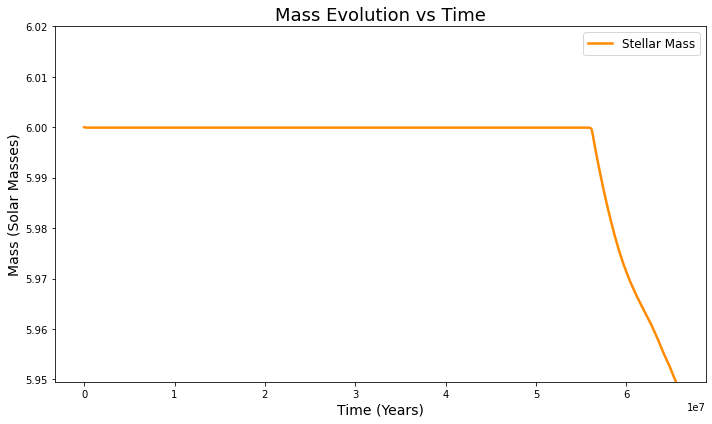

In [35]:
# Mass evolution

#Plot the mass M vs time t for your star. If it is almost constant, reduce the range of M until you can see the evolution clearly.

mass = h.data('star_mass')  # Mass of the star
time = h.star_age           # Time in years

plt.figure(figsize=(10, 6))
plt.plot(time, mass, color='darkorange', linestyle='-', linewidth=2.5, label='Stellar Mass')

plt.xlabel('Time (Years)', fontsize=14)
plt.ylabel('Mass (Solar Masses)', fontsize=14)
plt.title('Mass Evolution vs Time', fontsize=18)
plt.legend(fontsize=12)
plt.tight_layout()

plt.ylim(min(mass), max(mass)+0.02)
plt.savefig('./plots/mass_v_t.png', dpi=1200)
plt.show()